# Principal component analysis
We will perform principal component analysis (PCA) to perform dimensionality reduction. First, we will implement PCA on a 2D dataset to visualize what is happening more easily.

## PCA from 2D to 1D

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.io

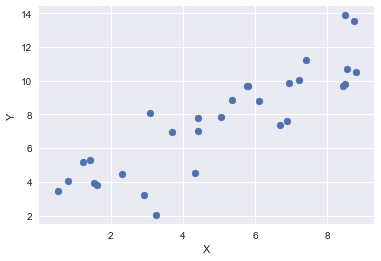

In [11]:
#generation of a linearly correlated 2D dataset
X = np.random.uniform(0, 10, 30)[:, np.newaxis]
Y = np.array([i + 2 + np.random.randn() * 2 for i in X])
data = np.hstack((X, Y))

#plot dataset
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(min(X) - 0.5, max(X) + 0.5)
ax.set_ylim(min(Y) - 0.5, max(Y) + 0.5)
plt.show()

PCA has two main computational steps. First, we calculate the **covariance matrix** of the data. Second, we calculate the **eigenvectors** $U_1, U_2, ... , U_n$, which correspond to the principal components of the variation in the data. It is important to **normalize and scale** the data by subtracting the mean and dividing by the standard deviation so each dimension is in the same range.

In [21]:
#data normalization
data_norm = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

After data normalization we calculate the **covariance matrix** of the data:
$$\Sigma = \frac{1}{m}X^{T}X$$
where X is the data matrix with examples in rows and $m$ is the number of examples. $\Sigma$ is a $n \times n$ matrix and not the summation operator.

In [40]:
#covariance matrix
Sigma = np.dot(data_norm.T, data_norm) / data_norm.shape[0]

We can now run the **singular value decomposition** (svd) on the covariance matrix to calculate the principal components.

In [41]:
#U are principal components vectors, S is the diagonal matrix
U, S, V = np.linalg.svd(Sigma)

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.87077527, 0.12922473]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

We now draw the principal components centered at the mean of data.

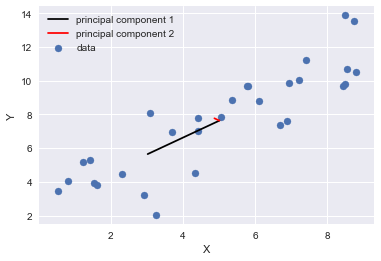

In [57]:
#position of principal components vectors
mu = np.mean(data, axis=0)
u0 = [[mu[0], (mu + 1.5 * np.dot(S[0], U[:, 0].T))[0]],
       [mu[1], (mu + 1.5 * np.dot(S[0], U[:, 0].T))[1]]]
u1 = [[mu[0], (mu + 1.5 * np.dot(S[1], U[:, 1].T))[0]],
       [mu[1], (mu + 1.5 * np.dot(S[1], U[:, 1].T))[1]]]

#plot data
fig, ax = plt.subplots()
ax.scatter(X, Y, label='data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(min(X) - 0.5, max(X) + 0.5)
ax.set_ylim(min(Y) - 0.5, max(Y) + 0.5)

#plot principal components
ax.plot(u0[0], u0[1], color='black', label='principal component 1')
ax.plot(u1[0], u1[1], color='red', label='principal component 2')

ax.legend()
plt.show()